# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import pandas_profiling

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Billboard data CSV:
billboard_csv = 'billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [6]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [7]:
df.shape

(317, 83)

In [8]:
df.head()

year      artist.inverted                                  track  time  \
0  2000      Destiny's Child               Independent Women Part I  3:38   
1  2000              Santana                           Maria, Maria  4:18   
2  2000        Savage Garden                     I Knew I Loved You  4:07   
3  2000              Madonna                                  Music  3:45   
4  2000  Aguilera, Christina  Come On Over Baby (All I Want Is You)  3:38   

  genre date.entered date.peaked  x1st.week  x2nd.week  x3rd.week  ...  \
0  Rock   2000-09-23  2000-11-18         78       63.0       49.0  ...   
1  Rock   2000-02-12  2000-04-08         15        8.0        6.0  ...   
2  Rock   1999-10-23  2000-01-29         71       48.0       43.0  ...   
3  Rock   2000-08-12  2000-09-16         41       23.0       18.0  ...   
4  Rock   2000-08-05  2000-10-14         57       47.0       45.0  ...   

   x67th.week  x68th.week  x69th.week  x70th.week  x71st.week  x72nd.week  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   x73rd.week  x74th.week  x75th.week  x76th.week  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN  

[5 rows x 83 columns]

In [9]:
#Rename Columns
df = df.rename({'artist.inverted':'artist',
                'date.entered':'release_date',
                'date.peaked':'peak_date'},axis=1)

In [10]:
#Fix Week Formatting
df.columns = df.columns.str.replace('.week','')
df.columns = df.columns.str.replace('x','week_')
df.columns = df.columns.str.replace('rd','')
df.columns = df.columns.str.replace('th','')
df.columns = df.columns.str.replace('st','')
df.columns = df.columns.str.replace('nd','')

df = df.rename({"arti":"artist"},axis=1)

In [11]:
#Convert Column Types
df.time = pd.to_datetime(df.time)
df.release_date = pd.to_datetime(df.release_date)
df.peak_date = pd.to_datetime(df.peak_date)

In [12]:
#new columns
#df['no_of_days_to_peak'] = df.release_date - df.peak_date

df['days_to_peak'] = df.peak_date - df.release_date
df['days_to_peak_int'] = (df.peak_date - df.release_date).dt.days

In [13]:
df.columns

Index(['year', 'artist', 'track', 'time', 'genre', 'release_date', 'peak_date',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55',
       'week_56', 'week_57', 'week_58', 'week_59', 'week_60', 'week_61',
       'week_62', 'week_63', 'week_64', 'week_65', 'week_66', 'week_67',
       'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73',
       'week_74', 'week_75', 'week_76', 'd

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 85 columns):
year                317 non-null int64
artist              317 non-null object
track               317 non-null object
time                317 non-null datetime64[ns]
genre               317 non-null object
release_date        317 non-null datetime64[ns]
peak_date           317 non-null datetime64[ns]
week_1              317 non-null int64
week_2              312 non-null float64
week_3              307 non-null float64
week_4              300 non-null float64
week_5              292 non-null float64
week_6              280 non-null float64
week_7              269 non-null float64
week_8              260 non-null float64
week_9              253 non-null float64
week_10             244 non-null float64
week_11             236 non-null float64
week_12             222 non-null float64
week_13             210 non-null float64
week_14             204 non-null float64
week_15             

In [15]:
df.dtypes

year                          int64
artist                       object
track                        object
time                 datetime64[ns]
genre                        object
                         ...       
week_74                     float64
week_75                     float64
week_76                     float64
days_to_peak        timedelta64[ns]
days_to_peak_int              int64
Length: 85, dtype: object

In [16]:
pd.options.display.max_rows = 999
df.isna().sum()

year                  0
artist                0
track                 0
time                  0
genre                 0
release_date          0
peak_date             0
week_1                0
week_2                5
week_3               10
week_4               17
week_5               25
week_6               37
week_7               48
week_8               57
week_9               64
week_10              73
week_11              81
week_12              95
week_13             107
week_14             113
week_15             120
week_16             135
week_17             140
week_18             151
week_19             161
week_20             171
week_21             252
week_22             262
week_23             269
week_24             271
week_25             279
week_26             281
week_27             288
week_28             293
week_29             297
week_30             297
week_31             298
week_32             299
week_33             305
week_34             307
week_35         

In [17]:
pandas_profiling.ProfileReport(df)

In [18]:
song_counts = df['artist'].value_counts().sort_values(ascending=False)

## Who were the top artists on the yer 2000

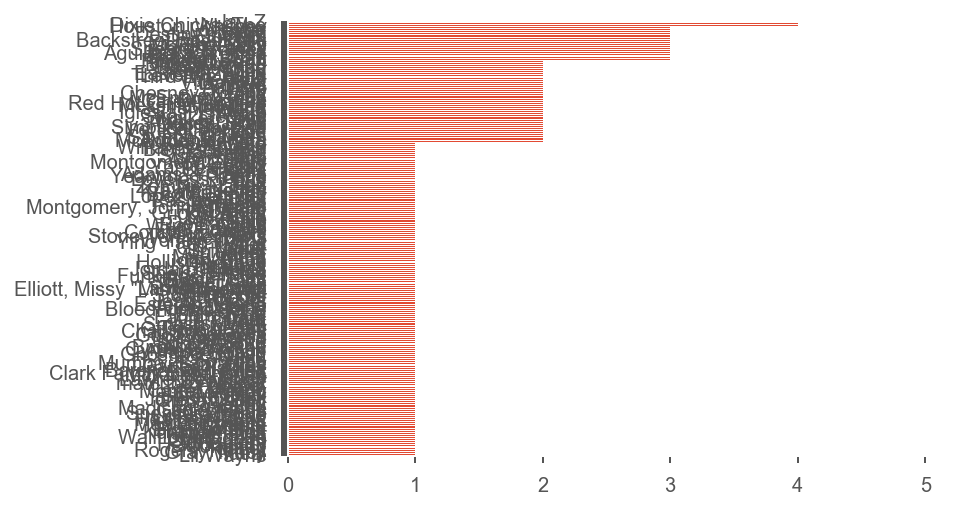

In [19]:
df['artist'].value_counts().sort_values().plot(kind='barh')

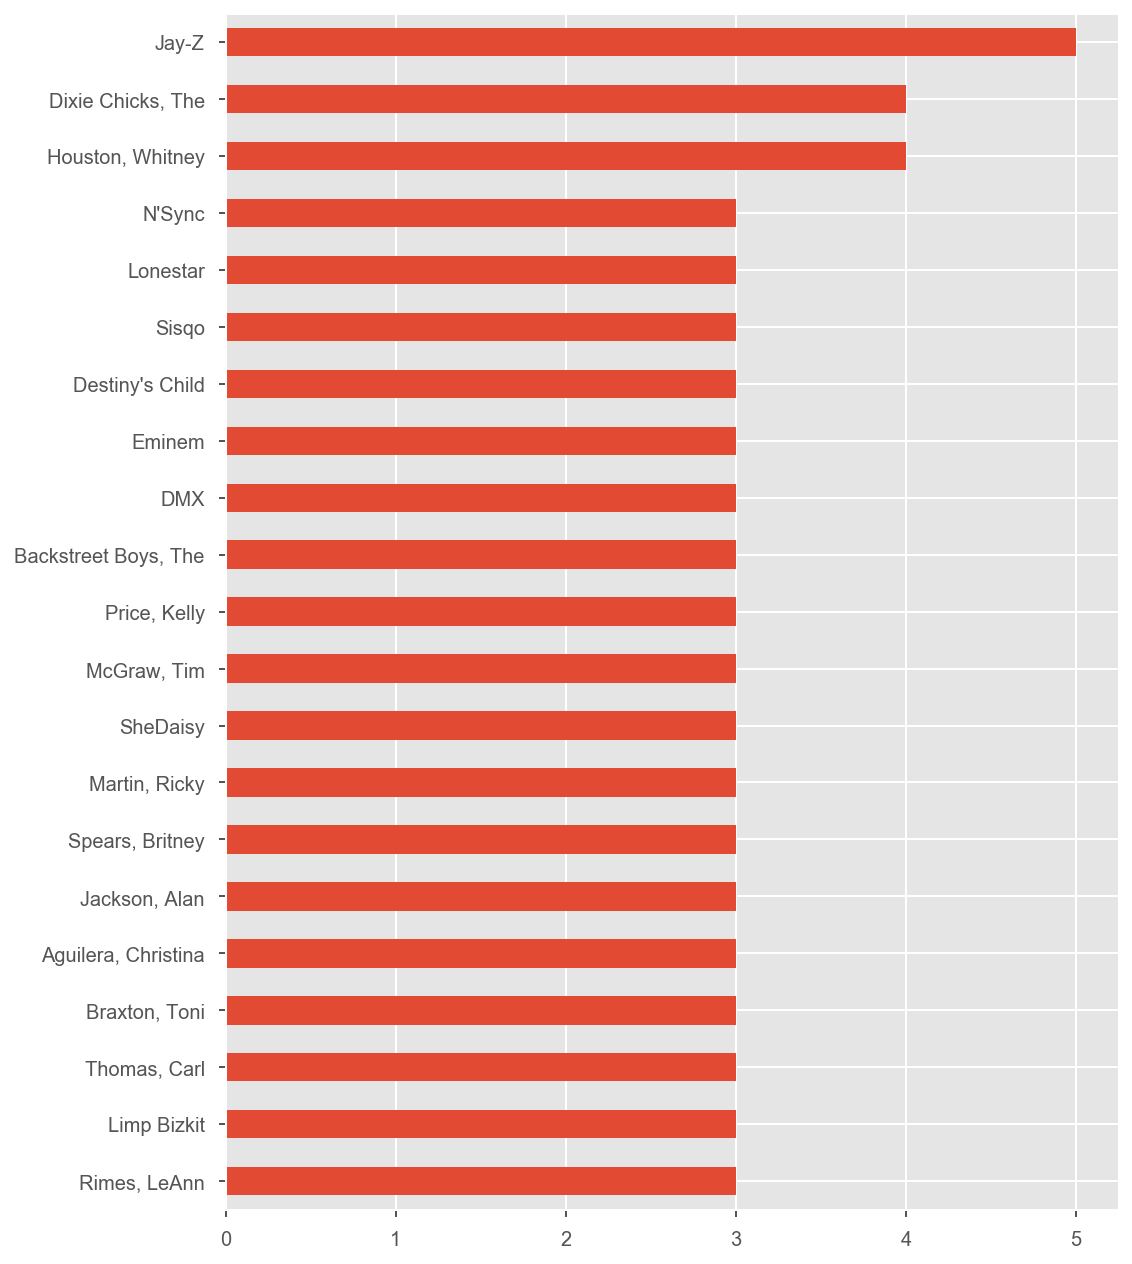

In [20]:
song_counts.nlargest(21).plot(kind='barh', figsize=(8,11)).invert_yaxis()

## What was the top genre

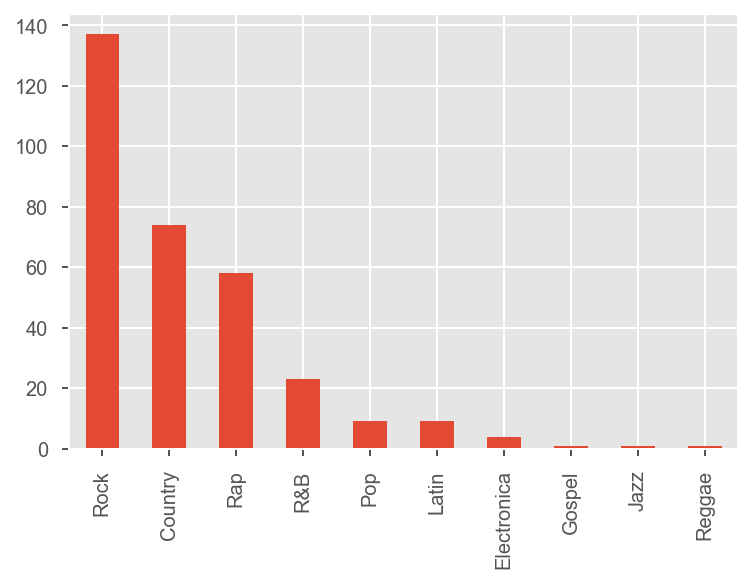

In [21]:
df.genre.value_counts().plot(kind="bar")

#rock was the top genre, none of the top arists look like "rock". Double check...

In [22]:
pd.options.display.max_rows = 15
df.groupby("artist").genre.value_counts().sort_values(ascending=False).head(10)

artist             genre  
Jay-Z              Rap        5
Houston, Whitney   Rock       4
Dixie Chicks, The  Country    4
Martin, Ricky      Latin      3
Rimes, LeAnn       Country    3
Destiny's Child    Rock       3
N'Sync             Rock       3
Braxton, Toni      Rock       3
Sisqo              Rock       3
Eminem             Rap        3
Name: genre, dtype: int64

## How long does it take a hit to peak?

In [23]:
df.columns

Index(['year', 'artist', 'track', 'time', 'genre', 'release_date', 'peak_date',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55',
       'week_56', 'week_57', 'week_58', 'week_59', 'week_60', 'week_61',
       'week_62', 'week_63', 'week_64', 'week_65', 'week_66', 'week_67',
       'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73',
       'week_74', 'week_75', 'week_76', 'd

In [24]:
df.days_to_peak.describe()

count                        317
mean     52 days 05:54:19.305993
std      40 days 20:49:20.696756
min              0 days 00:00:00
25%             21 days 00:00:00
50%             49 days 00:00:00
75%             70 days 00:00:00
max            315 days 00:00:00
Name: days_to_peak, dtype: object

In [25]:
df.days_to_peak.value_counts()

49 days     30
70 days     24
35 days     24
63 days     23
14 days     22
            ..
140 days     1
175 days     1
210 days     1
133 days     1
168 days     1
Name: days_to_peak, Length: 27, dtype: int64

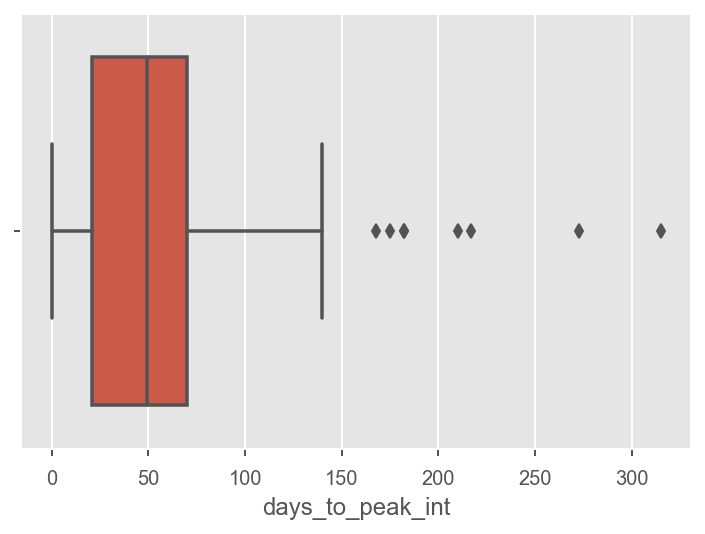

In [26]:
sns.boxplot(x=df['days_to_peak_int'])

In [27]:
df.loc[df.days_to_peak == '0 days', ['artist', 'track', 'genre', 'release_date', 'peak_date']]

artist                track genre release_date  peak_date
114     Carey, Mariah              Crybaby  Rock   2000-06-24 2000-06-24
175         Pearl Jam  Nothing As It Seems  Rock   2000-05-13 2000-05-13
232         Nine Days              If I Am  Rock   2000-12-02 2000-12-02
243             Q-Tip     Breathe And Stop  Rock   2000-01-22 2000-01-22
247  Wallflowers, The          Sleepwalker  Rock   2000-10-28 2000-10-28
..                ...                  ...   ...          ...        ...
312  Ghostface Killah     Cherchez LaGhost   R&B   2000-08-05 2000-08-05
313       Smith, Will          Freakin' It   Rap   2000-02-12 2000-02-12
314     Zombie Nation        Kernkraft 400  Rock   2000-09-02 2000-09-02
315    Eastsidaz, The             Got Beef   Rap   2000-07-01 2000-07-01
316            Fragma       Toca's Miracle   R&B   2000-10-28 2000-10-28

[19 rows x 5 columns]

## Understand Weeks

In [28]:
df.columns

Index(['year', 'artist', 'track', 'time', 'genre', 'release_date', 'peak_date',
       'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7',
       'week_8', 'week_9', 'week_10', 'week_11', 'week_12', 'week_13',
       'week_14', 'week_15', 'week_16', 'week_17', 'week_18', 'week_19',
       'week_20', 'week_21', 'week_22', 'week_23', 'week_24', 'week_25',
       'week_26', 'week_27', 'week_28', 'week_29', 'week_30', 'week_31',
       'week_32', 'week_33', 'week_34', 'week_35', 'week_36', 'week_37',
       'week_38', 'week_39', 'week_40', 'week_41', 'week_42', 'week_43',
       'week_44', 'week_45', 'week_46', 'week_47', 'week_48', 'week_49',
       'week_50', 'week_51', 'week_52', 'week_53', 'week_54', 'week_55',
       'week_56', 'week_57', 'week_58', 'week_59', 'week_60', 'week_61',
       'week_62', 'week_63', 'week_64', 'week_65', 'week_66', 'week_67',
       'week_68', 'week_69', 'week_70', 'week_71', 'week_72', 'week_73',
       'week_74', 'week_75', 'week_76', 'd

In [29]:
df.week_1.value_counts(dropna=False)

77    16
99    14
98    14
81    14
75    12
      ..
52     1
54     1
56     1
62     1
15     1
Name: week_1, Length: 63, dtype: int64

In [30]:
df.iloc[:,7:83]

week_1  week_2  week_3  week_4  week_5  week_6  week_7  week_8  week_9  \
0        78    63.0    49.0    33.0    23.0    15.0     7.0     5.0     1.0   
1        15     8.0     6.0     5.0     2.0     3.0     2.0     2.0     1.0   
2        71    48.0    43.0    31.0    20.0    13.0     7.0     6.0     4.0   
3        41    23.0    18.0    14.0     2.0     1.0     1.0     1.0     1.0   
4        57    47.0    45.0    29.0    23.0    18.0    11.0     9.0     9.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
312      98     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
313      99    99.0    99.0    99.0     NaN     NaN     NaN     NaN     NaN   
314      99    99.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
315      99    99.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
316      99     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     week_10  ...  week_67  week_68  week_69  week_70  week_71  week_72  \
0        1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
1        1.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
2        4.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3        2.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
4       11.0  ...      NaN      NaN      NaN      NaN      NaN      NaN   
..       ...  ...      ...      ...      ...      ...      ...      ...   
312      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
313      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
314      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
315      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   
316      NaN  ...      NaN      NaN      NaN      NaN      NaN      NaN   

     week_73  week_74  week_75  week_76  
0        NaN      NaN      NaN      NaN  
1        NaN      NaN      NaN      NaN  
2        NaN      NaN      NaN      NaN  
3        NaN      NaN      NaN      NaN  
4        NaN      NaN      NaN      NaN  
..       ...      ...      ...      ...  
312      NaN      NaN      NaN      NaN  
313      NaN      NaN      NaN      NaN  
314      NaN      NaN      NaN      NaN  
315      NaN      NaN      NaN      NaN  
316      NaN      NaN      NaN      NaN  

[317 rows x 76 columns]

In [31]:
df.isna().sum()

year                  0
artist                0
track                 0
time                  0
genre                 0
                   ... 
week_74             317
week_75             317
week_76             317
days_to_peak          0
days_to_peak_int      0
Length: 85, dtype: int64

In [32]:
df.describe()

year      week_1      week_2      week_3      week_4      week_5  \
count   317.0  317.000000  312.000000  307.000000  300.000000  292.000000   
mean   2000.0   79.958991   71.173077   65.045603   59.763333   56.339041   
std       0.0   14.686865   18.200443   20.752302   22.324619   23.780022   
min    2000.0   15.000000    8.000000    6.000000    5.000000    2.000000   
25%    2000.0   74.000000   63.000000   53.000000   44.750000   38.750000   
50%    2000.0   81.000000   73.000000   66.000000   61.000000   57.000000   
75%    2000.0   91.000000   84.000000   79.000000   76.000000   73.250000   
max    2000.0  100.000000  100.000000  100.000000  100.000000  100.000000   

           week_6      week_7      week_8      week_9  ...  week_69  week_70  \
count  280.000000  269.000000  260.000000  253.000000  ...      0.0      0.0   
mean    52.360714   49.219331   47.119231   46.343874  ...      NaN      NaN   
std     24.473273   25.654279   26.370782   27.136419  ...      NaN      NaN   
min      1.000000    1.000000    1.000000    1.000000  ...      NaN      NaN   
25%     33.750000   30.000000   27.000000   26.000000  ...      NaN      NaN   
50%     51.500000   47.000000   45.500000   42.000000  ...      NaN      NaN   
75%     72.250000   67.000000   67.000000   67.000000  ...      NaN      NaN   
max     99.000000  100.000000   99.000000  100.000000  ...      NaN      NaN   

       week_71  week_72  week_73  week_74  week_75  week_76  \
count      0.0      0.0      0.0      0.0      0.0      0.0   
mean       NaN      NaN      NaN      NaN      NaN      NaN   
std        NaN      NaN      NaN      NaN      NaN      NaN   
min        NaN      NaN      NaN      NaN      NaN      NaN   
25%        NaN      NaN      NaN      NaN      NaN      NaN   
50%        NaN      NaN      NaN      NaN      NaN      NaN   
75%        NaN      NaN      NaN      NaN      NaN      NaN   
max        NaN      NaN      NaN      NaN      NaN      NaN   

                  days_to_peak  days_to_peak_int  
count                      317        317.000000  
mean   52 days 05:54:19.305993         52.246057  
std    40 days 20:49:20.696756         40.867601  
min            0 days 00:00:00          0.000000  
25%           21 days 00:00:00         21.000000  
50%           49 days 00:00:00         49.000000  
75%           70 days 00:00:00         70.000000  
max          315 days 00:00:00        315.000000  

[8 rows x 79 columns]